In [1]:
# Required
from matplotlib import pyplot as plt
import numpy as np
from math import pi, sin, cos, sqrt, pow, radians, degrees, hypot

A solid steel shaft with Sy= 250MPa, carries belt tensions at pulley C, as shown in Figure below. Given diameter of pulley is 300mm, and a factor of safety of n=1.5, design the shaft according to the following failure criteria

Maximum shear stress

Maximum energy of distortion



In [2]:
F1 = 5000
F2 = 1000
rC = 0.15
Sy= 250E+6
FOS=1.5

In [3]:
Fc=F1+F2
print(f'Total Load, Fc = {Fc} N')

Total Load, Fc = 6000 N


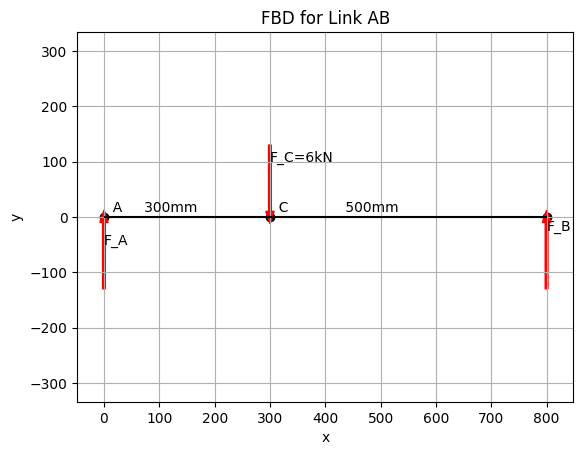

In [4]:
# FBD for Link AB

coorA = [0,0]
coorB = [800,0]
coorC = [300,0]

data = np.array([coorA,coorB,coorC])
x, y = data.T
fig, ax = plt.subplots()
ax.grid()
ax.scatter(x,y, color='k')
ax.arrow(coorA[0],coorA[1]-130, 0,120,width=5,color='r')
ax.arrow(coorB[0],coorB[1]-130, 0,120,width=5,color='r')
ax.vlines(coorC[0],0,coorC[1], color='k', linestyles='dashed')
ax.arrow(coorC[0],coorC[1]+130, 0,-120,width=5,color='r')
ax.hlines(0,0,800, color='k')

ax.set(xlabel='x', ylabel='y',
       title='FBD for Link AB')

ax.text(coorA[0],coorA[1]-50,f'F_A')
ax.text(coorB[0],coorB[1]-25,f'F_B')
ax.text(coorC[0],coorC[1]+100,f'F_C=6kN')
ax.text(coorA[0],coorA[1]+10,f'  A     300mm')
ax.text(coorC[0],coorC[1]+10,f'  C             500mm')

plt.axis('equal')
plt.show()

$$+\circlearrowleft \sum M_A=0$$
$$-F_C(0.3)+F_B(0.8)=0$$
$$-(6000)(0.3)+F_B(0.8)=0$$

$$+\uparrow \sum F_x=0$$
$$F_A+F_B-6000=0$$

In [5]:
Fb=(Fc*300)/(800)
print(f'Reaction at B, Fb = {Fb:.2f} N')
Fa=6000-Fb
print(f'Reaction at A, Fa = {Fa:.2f} N')

Reaction at B, Fb = 2250.00 N
Reaction at A, Fa = 3750.00 N


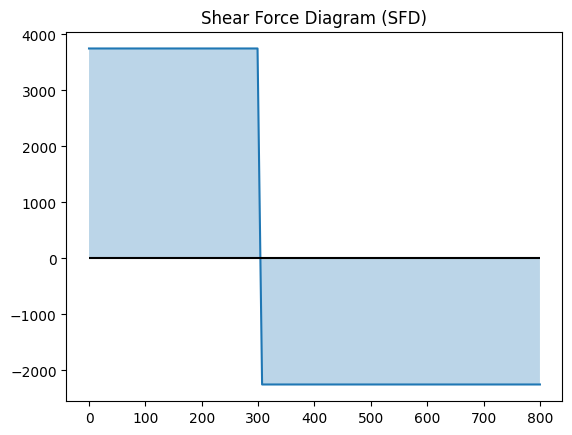

In [6]:
# Distance in mm
ab=800
ac=300
y = np.linspace(0,ab,100) # Create distance variables
V = np.zeros_like(y) # Create Shear Force for each distance
for i, xi in enumerate(y):
    if xi < ac:
        V[i] = Fa
    else:
        V[i] = Fa - Fc

fig, ax1 = plt.subplots()
# SFD
ax1.plot(y,V)
ax1.hlines(0,0,ab,colors='black')
ax1.fill_between(y, V, alpha=0.3) # Added fill_between
ax1.set_title('Shear Force Diagram (SFD)')


# plt.tight_layout()
plt.show()

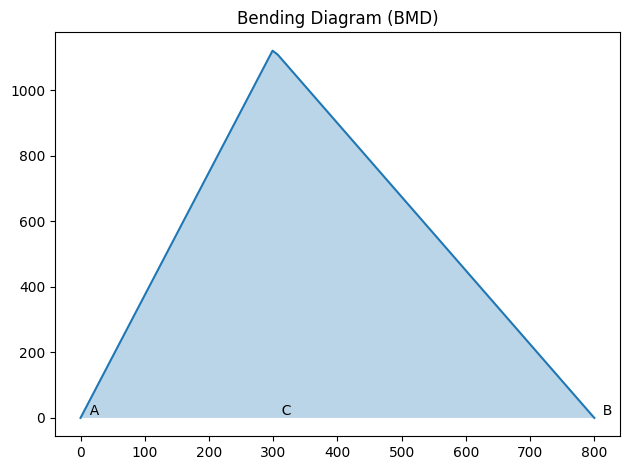

In [7]:
#BMD
ab=800
ac=300
y = np.linspace(0,ab,100) # Create distance variables
M = np.zeros_like(y) # Create Moment for each distance
for i, xi in enumerate(y):
    if xi <= ac:
        M[i] = Fa * xi/1000
    else:
        M[i] = Fa * xi/1000 - Fc * (xi - ac)/1000

fig, ax2 = plt.subplots()

ax2.plot(y,M)
ax2.fill_between(y, M, alpha=0.3) # Added fill_between
ax2.set_title('Bending Diagram (BMD)')

ax2.text(coorA[0],coorA[1]+10,f'  A')
ax2.text(coorB[0],coorB[1]+10,f'  B')
ax2.text(coorC[0],coorC[1]+10,f'  C')
# ax2.text(coorD[0],coorD[1],f'  D')

plt.tight_layout()
plt.show()

Step 1 : Find torque at Pulley A

In [8]:
TorqueA = (F1-F2)*rC
print(f'Torque = {TorqueA} Nm')

Torque = 600.0 Nm


Step 2: Calculate Forces on the shaft

i) Calculate net forces acting at pulley A and pulley C due to belt tensions.

ii) What are the horizontal and vertical components/planes of the belt tensions acting on
both pulleys? Draw the FBD separately for both components/planes.

Step 3: Calculate reaction forces at bearings using static equilibrium

i) Calculate the reaction forces at bearings B and D. Input the forces on the FBD in step 2
following correct direction.

In [9]:
Btotal = round(hypot(Bx,By),2)
Dtotal = round(hypot(Dx,Dy),2)
print(f'B = {Btotal} N')
print(f'D = {Dtotal} N')

NameError: name 'Bx' is not defined

Step 4: Construct the shear force and bending moment diagrams

i)	Construct the shear force and bending moment diagrams following the correct direction from the FBD of both components

ii)	Calculate the resultant bending moment at each point

iii)	Determine the critical point and the maximum bending moment value


In [ ]:
Mbx=0

In [ ]:
bc=0.4
Mcx = round(Bx*bc,2)
print(f'Mcx={Mcx} Nm')

Mcx=205.31 Nm


In [ ]:
cd=0.1
Mdx = Mcx-round(Bx*bc,2)
print(f'Mdx={Mdx} Nm')

Mdx=0.0 Nm


In [ ]:
ab=0.3
Mby = round(-Fa*ab,2)
print(f'Mby={Mby} Nm')

Mby=-1005.0 Nm


In [ ]:
bc=0.4
Mcy = Mby+round(-Dy*bc,2)
print(f'Mcy={Mcy} Nm')

Mcy=-201.0 Nm


In [ ]:
bd=0.5
Mdy = Mby+round(-Dy*bd,2)
print(f'Mdy={Mdy} Nm')

Mdy=0.0 Nm


In [ ]:
Mb = round(hypot(Mbx,Mby))
Mc = round(hypot(Mcx,Mcy))
print(f'Mb={Mb} Nm')
print(f'Mc={Mc} Nm')

Mb=1005 Nm
Mc=287 Nm


In [ ]:
Mmax = Mb

Step 5: Determine the diameter of the shaft using the failure theories

i) Determine the diameter of the shaft using shear stress theory of failure

ii) Determine the diameter of the shaft using energy distortion theory of failure

In [ ]:
Dmss = round(pow(32*fos*hypot(Mmax,TorqueA)/(Sy*pi),1/3),5)
print(f'Diameter = {Dmss}m')

Diameter = 0.042m


In [ ]:
Dmed = round(pow(32*fos*sqrt(pow(Mmax,2)+0.75*pow(TorqueA,2))/(Sy*pi),1/3),5)
print(f'Diameter = {Dmed}m')

Diameter = 0.04196m


More well defined questions:

1)	What is the new diameter if the factor of safety was increased to 3

2)	How would the design of the shaft change if the rotational speed was increased to 720 rpm while maintaining the same power transmission? Does the bending moment affected by the change of speed?

3)	If the material of the shaft is changed to a high-strength alloy with a yield strength of 400 MPa, while maintaining the same factor of safety, calculate the new shaft diameter


In [ ]:
fos=3
Dmss = round(pow(32*fos*hypot(Mmax,TorqueA)/(Sy*pi),1/3),5)
print(f'Diameter = {Dmss}m')

Diameter = 0.04808m


In [ ]:
nA = 720
F1 = 2500
F2 = 850
rA = 0.1
rC = 0.15
Sy= 280E+6
fos=2

In [ ]:
TorqueA = (F1-F2)*rA
print(f'Torque = {TorqueA} N')

Torque = 165.0 N


In [ ]:
Power = round((2*pi*nA/60)*TorqueA,2)
print(f'Power = {Power} W')

Power = 12440.71 W


In [ ]:
TorqueB=round(Power*60/(2*pi*nA),2)
print(f'Torque = {TorqueB} Nm')
print('Torque is same for Pulley A and C')

Torque = 165.0 Nm
Torque is same for Pulley A and C


In [ ]:
T2=round(TorqueB/(rC*1.5),2)
print(f'T2 = {T2} N')
T1 = round(2.5*T2)
print(f'T1 = {T1} N')
print('No changes in tensions and bending moment not changed.')

T2 = 733.33 N
T1 = 1833 N
No changes in tensions and bending moment not changed.


In [ ]:
fos=2
Sy=400E+6
Dmss = round(pow(32*fos*hypot(Mmax,TorqueA)/(Sy*pi),1/3),5)
print(f'Diameter = {Dmss}m')


Diameter = 0.03729m
